# Logistisches Modell

In [289]:
import pathlib
import urllib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In dieser Übung sollen Sie die Kostenfunktion einer logistischen Regression visualisieren. Dazu benötigen Sie Daten, die Sie zunächst aufbereiten, kodieren, und visualisieren sollen.

## Daten einlesen und verarbeiten

Als Datengrundlage bietet sich der Iris-Datensatz an. Laden Sie ihn zunächst herunter, falls erforderlich, und lesen ihn ein:

In [290]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data_file = pathlib.Path(url.rsplit('/', 1)[-1])

if not data_file.is_file():
    # We could also use `df_iris = pd.read_csv(url)`
    # but here we save to disk to avoid unnecessary repeated downloads.
    urllib.request.urlretrieve(url, data_file)

df_iris = pd.read_csv(data_file.resolve(), header=None)

Für diese Aufgabe benötigen Sie einen eindimensionalen Datensatz, dem genau ein binäres Label zugeordnet ist. In den Spalten sind die folgenden Größen in dieser Reihenfolge enthalten:

In [291]:
column_names = ["sepal_length", "sepal_width", 'petal_length', 'petal_width', 'species']

`(A)` Ordnen zunächst dem DataFrame die Spaltennamen zu. Prüfen Sie die Datentypen und passen Sie sie ggf. an. Beachten Sie insbesondere die Spalte `'species'` und setzen Sie dafür einen kategorischen Datentyp (`pd.CategoricalDtype`).

In [292]:
df_iris.loc[:, :3] = df_iris.loc[:, :3].transform(lambda x: x * 10).astype(np.int8)

df_iris = (
    df_iris
    .rename(columns=dict(enumerate(column_names)))
    .astype({'sepal_length': np.int8, 'sepal_width': np.int8, 'petal_length': np.int8, 'petal_width': np.int8,
        'species': pd.CategoricalDtype(categories=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])})
)

df_iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    int8    
 1   sepal_width   150 non-null    int8    
 2   petal_length  150 non-null    int8    
 3   petal_width   150 non-null    int8    
 4   species       150 non-null    category
dtypes: category(1), int8(4)
memory usage: 1010.0 bytes


Für unser Modell beschränken wir uns auf die Kelchblattlänge (`'sepal length'`) der Spezies `Iris-virginica` und `Iris-setosa`.

`(A)`  Stellen Sie für diese beiden Spezies die Verteilung der Kelchblattlängen grafisch in einem Diagramm dar.

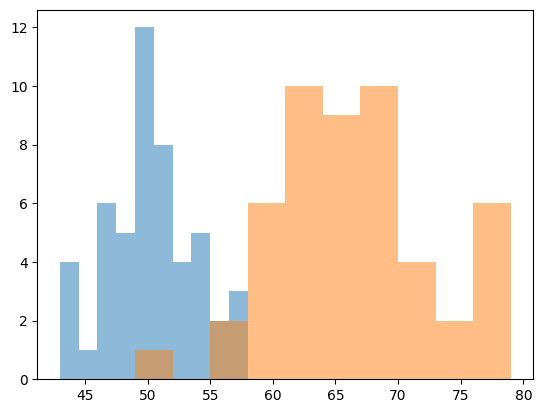

In [293]:
"""species = df_iris.groupby('species')
virginica = species.get_group('Iris-virginica')
setosa = species.get_group('Iris-setosa')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.hist(setosa['sepal_length'], bins=10)
ax.hist(virginica['sepal_length'], bins=10)"""

quantity = 'sepal_length'
species = ['Iris-setosa', 'Iris-virginica']

for s in species:
    plt.hist(df_iris[df_iris['species'] == s][quantity], bins=10, alpha=0.5, label=s)

## Daten auswählen und Variablen kodieren

`(A)` Als nächstes sollen Sie den Datensatz filtern und die Variablen kodieren. Beschränken Sie sich auf alle Datenpunkte ausschließlich der *Kelchblattlänge*, die zu einer der beiden obigen Spezies gehören. Setzen Sie den Index zurück. Ersetzen Sie die Spalte `species` durch eine Series mit Einträgen vom Typ Integer, und zwar `0`, falls es sich um `Iris-setosa` handelt, und `1`, falls es sich um `Iris-virginica` handelt.

Denken Sie daran, idiomatischen, verständlichen, und performanten Code zu schreiben — auch wenn dieser Datensatz noch klein ist.

In [294]:
sepal_series = df_iris.loc[df_iris.species.isin(species), [quantity, 'species']].reset_index(drop=True)
sepal_series = (
    sepal_series
    .assign(
        species = (
            sepal_series
            .species
            .cat.remove_unused_categories()
            .cat.codes
        )
    )
)
sepal_series

,sepal_length,species
0,51,0
1,49,0
2,47,0
3,46,0
4,50,0
...,...,...
95,67,1
96,63,1
97,65,1
98,62,1


## Modell aufstellen

Um für eine kontinuierliche Variable $x$ ein binäres Label $y$ vorherzusagen, bietet sich ein logistisches Modell an. Hier ist $x$ die Kelchblattlänge und $y$ die Spezies der zugehörigen Pflanze, so kodiert, dass $y=0$ bzw. $y=1$ der Spezies "Iris setosa" bzw. "Iris virginica" entspricht.

Die Vorhersage eines logistischen Modells $\hat{y}(x)$ ist dann die *Wahrscheinlichkeit*, mit der es sich bei einer Pflanze dieser Kelchblattlänge um die Spezies "Iris virginica" handelt. Für eine Variable hat es zwei freie Parameter $a_0$ und $a_1$ und lautet:

$$\hat{y}(x) = \frac{1}{1 + \mathrm{e}^{- (a_0 + a_1 x)}}$$

`(R)` Schreiben Sie eine entsprechende Funktion mit der folgenden Signatur:
```python
logistic_model(x, a_0, a_1) -> float
```

In [295]:
...

Ellipsis

`(A)` Stellen Sie in einer gemeinsamen Abbildung die Datenpunkte sowie das logistische Modell mit $a_0 = -80;~~a_1 = 15$ sinnvoll im gesamten Datenbereich dar.

In [296]:
...

Ellipsis

## Wert der Kostenfunktion für ausgewählte Modelle

Als Kostenfunktion für logistische Regression dient die "mittlere Kreuzentropie":

`(R)` Schreiben Sie eine Funktion zu deren Berechnung, mit der folgenden Signatur:
```python
average_cross_entropy(predictions: pd.Series, truth: pd.Series) -> float
```

In [297]:
...

Ellipsis

`(A)` Berechnen Sie die mittlere Kreuzentropie zwischen den Daten und dem logistischen Modell mit $a_0 = -80; ~~ a_1 = 15$ sowie vier weiteren logistischen Modellen mit von Ihnen gewählten Werten für $a_0$ und $a_1$.

`(A)` Stellen Sie diese Modelle gemeinsam mit den Daten und den mittleren Kreuzentropien sinnvoll gemeinsam dar.

In [298]:
...

Ellipsis

## Konturplot der Kostenfunktion

`(T)` Erstellen Sie einen Konturplot der Kostenfunktion. Tragen Sie dazu die mittlere Kreuzentropie eines logistischen Modells mit den Parametern $a_0$ und $a_1$ als Konturplot gegen die Parameter $a_0$ und $a_1$ auf. Wählen Sie einen sinnvollen Wertebereich für die Parameter. Welche Form hat der Bereich mit "kleinen" Werten der Kostenfunktion? Wann und warum treten sehr große Werte auf?

Hilfe zur Erstellung eines Konturplots mit matplotlib finden Sie z.B. unter https://alex.miller.im/posts/contour-plots-in-python-matplotlib-x-y-z/. Es bietet sich an, zunächst die `np.meshgrid`s für `a_0` und `a_1` zu erstellen, die Daten dann in das auf dieser Seite beschriebene "long"-Format umzuwandeln, dort die Kostenfunktion auszuwerten, und dann wie dort beschrieben mit der `pivot_table`-Methode die Werte der Kostenfunktion in das zum Plotten benötigte Format umzuwandeln.

In [299]:
...

Ellipsis

## Mit den Daten herumspielen

Sobald Sie für einen Datensatz die Kostenfunktion mit einem Konturplot visualisiert haben, sollte es relativ leicht sein, dies für andere Datensätze zu wiederholen. In der csv-Datei sind auch andere Größen und alle Spezies kodiert.

Wählen Sie z.B. eine andere Messgröße, eine andere Kombination von Spezies (achten Sie dann auf deren Kodierung!), oder transformieren Sie Ihre Daten vor Darstellung der Kostenfunktion. In der Vorlesung wurde beispielsweise Skalierung von Mittelwert und Standardabweichung als sinnvolle Transformation oder die Kostenfunktion "Mean Squared Error" als nicht für logistische Regression geeignet angesprochen. Sie könnten auch dies implementieren und diskutieren.

`(T)` Probieren Sie mehrere Ansätze aus und setzen Sie diese um. Es ist nicht so wichtig, *was* Sie genau tun, wie *dass* Sie mehrere Dinge versuchen und zumindest ein interessantes Ergebnis erhalten und sinnvoll visualisieren. Dokumentieren Sie Ihr Vorgehen sinnvoll.

In [300]:
...

Ellipsis